In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
print(colored('\nAll libraries imported succesfully', 'green'))


All libraries imported succesfully


In [8]:
pd.options.mode.copy_on_write = True # Allow re-write on variable
sns.set_style('darkgrid') # Seaborn style
warnings.filterwarnings('ignore') # Ignore warnings
pd.set_option('display.max_columns', None) # Setting this option will print all collumns of a dataframe
pd.set_option('display.max_colwidth', None) # Setting this option will print all of the data in a feature

In [9]:
print(colored('\nAll libraries Configed succesfully.', 'green'))


All libraries Configed succesfully.


Import Data

In [10]:
data = pd.read_csv('/kaggle/water_potability.csv')
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

Info Data

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [12]:
data.describe().loc[['min', '50%', 'mean', 'max', 'std']].T.style.background_gradient(axis=1)

In [13]:
columns_name = data.columns
for index, col_name in enumerate(columns_name):
    print(index, col_name)

0 ph
1 Hardness
2 Solids
3 Chloramines
4 Sulfate
5 Conductivity
6 Organic_carbon
7 Trihalomethanes
8 Turbidity
9 Potability


Show Data Visualization

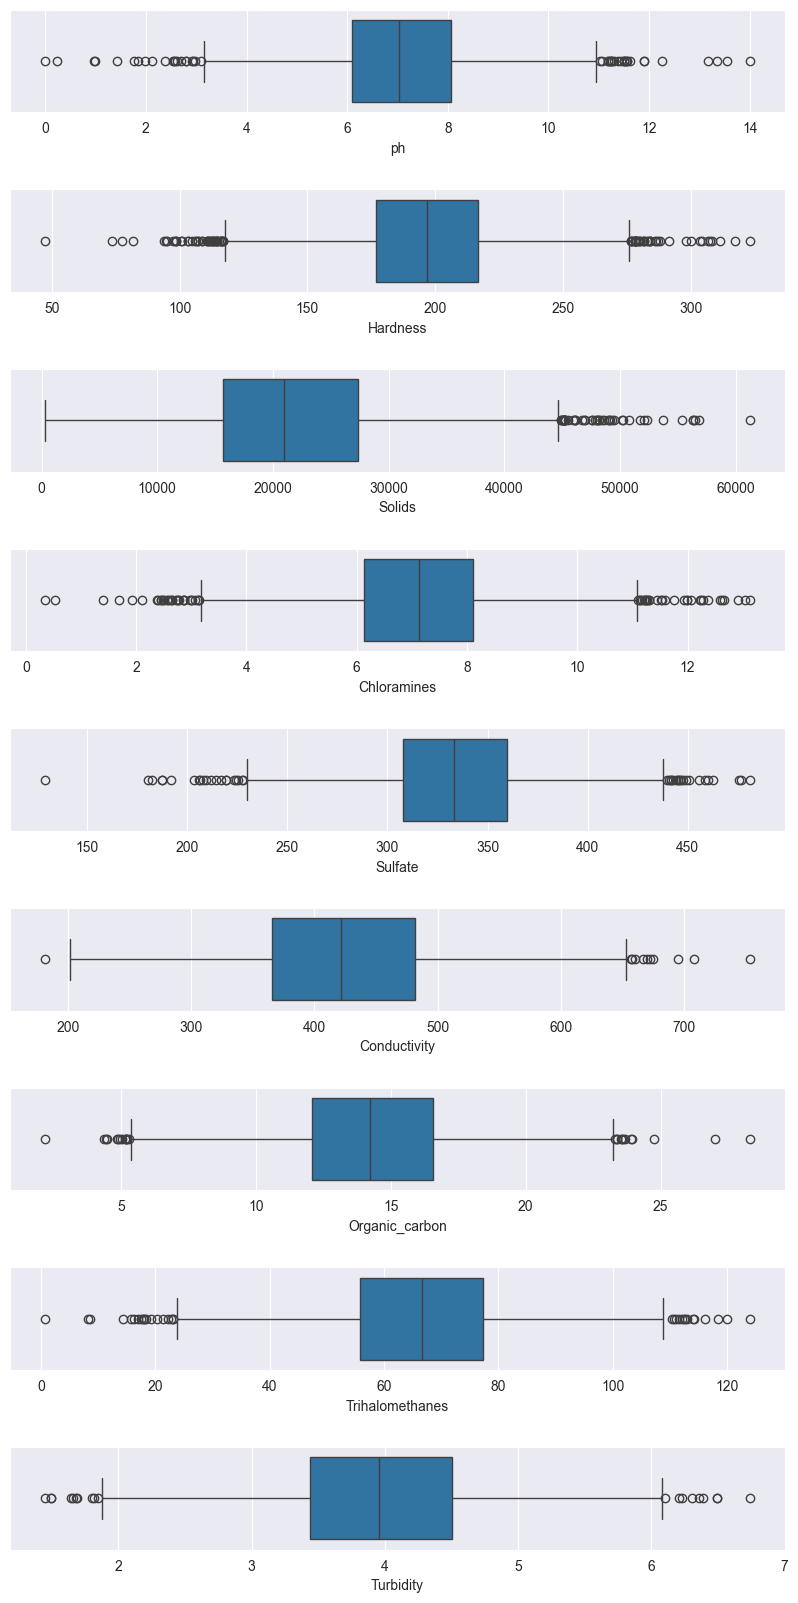

In [14]:
fig, ax = plt.subplots(9, 1, figsize=(10, 20))
fig.subplots_adjust(hspace=0.75)
for i in range(9) :
    # Ax
    sns.boxplot(x=columns_name[i], data=data, ax=ax[i])

Potability
0    1998
1    1278
Name: count, dtype: int64


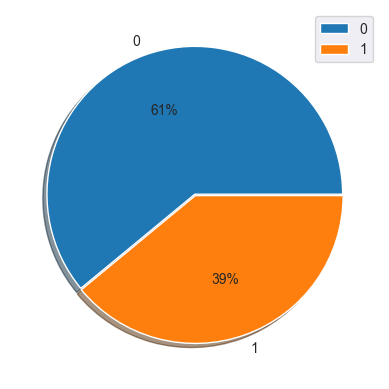

In [15]:
tar = data['Potability'].value_counts()
print(tar)

plt.pie(tar, labels=[0, 1], explode=[0, 0.01], autopct='%.f%%', shadow=True)
plt.legend()
plt.show()

Data Correlation

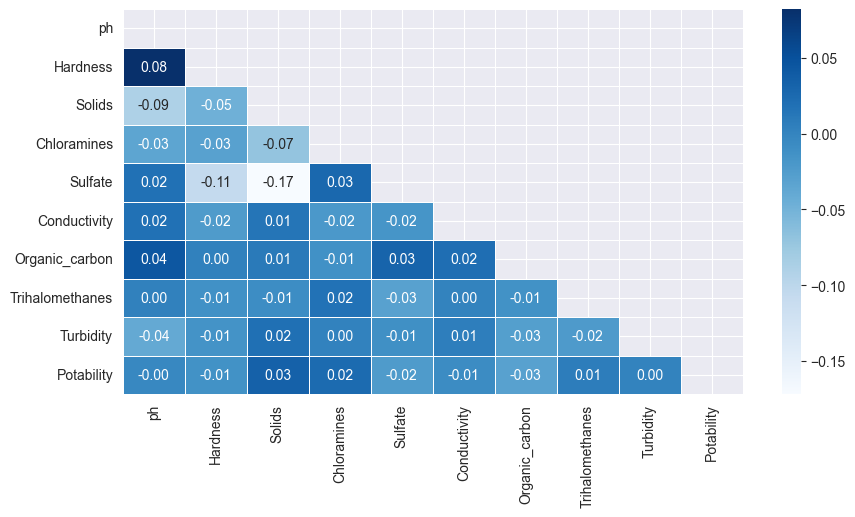

In [17]:
corr = data.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, linecolor='white', mask=np.triu(corr), cmap='Blues')
plt.show()

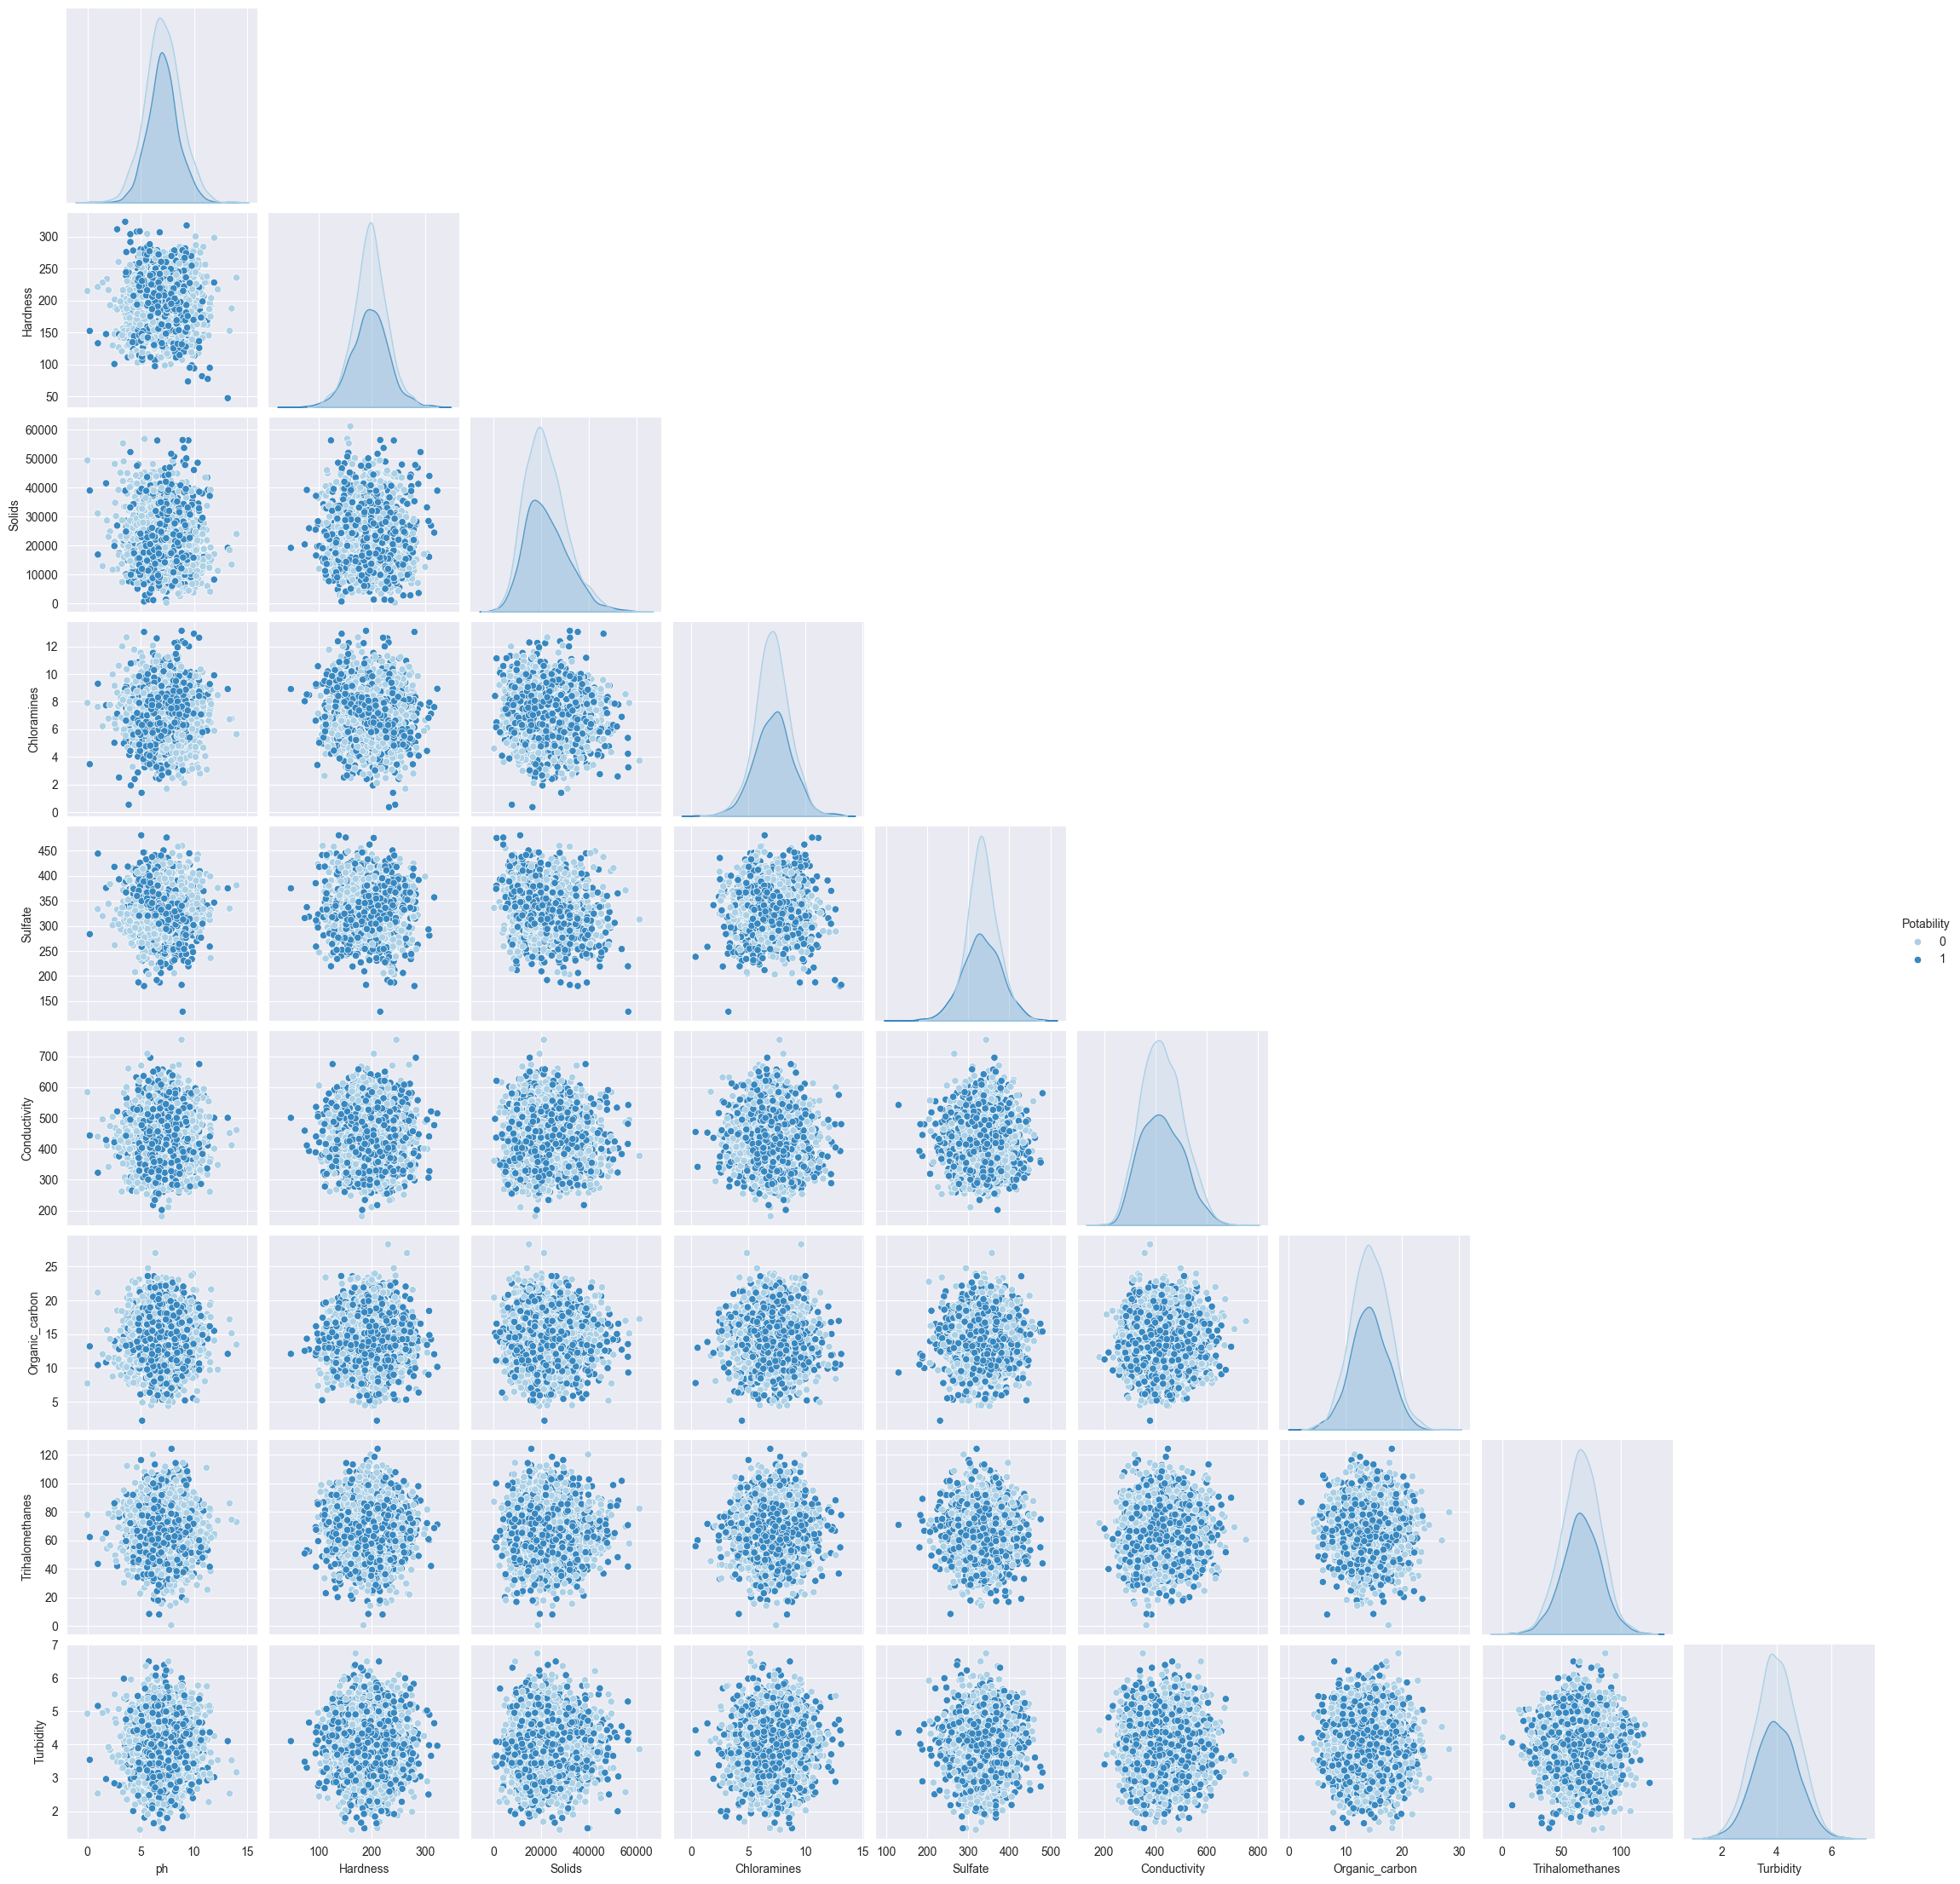

In [18]:
sns.pairplot(data, hue='Potability', corner=True, palette='Blues')
plt.show()

Missing Value Handling

In [19]:
data.isna().sum() 

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [20]:
print("Number of all samples : ", len(data))

Number of all samples :  3276


In [21]:
print('Percentage(%) of nulls for each columns : \n')
print((data.isna().sum()/len(data))*100)

Percentage(%) of nulls for each columns : 

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


Because of large number of missing values, we replace them with median for each column.
columns with missing values : - ph - Sulfate - Trihalomethanes

In [22]:
print("For Potability=1")
data[data.Potability==1][['ph', 'Sulfate', 'Trihalomethanes']].median()

For Potability=1


ph                   7.036752
Sulfate            331.838167
Trihalomethanes     66.678214
dtype: float64

In [23]:
print("For Potability=0")
data[data.Potability==0][['ph', 'Sulfate', 'Trihalomethanes']].median()

For Potability=0


ph                   7.035456
Sulfate            333.389426
Trihalomethanes     66.542198
dtype: float64

For both Potability=1 and Potability=0, medians are approximately equal.
Then replace them all with their medians

In [24]:
data['ph'] = data['ph'].fillna(value=data['ph'].median())
data['Sulfate'] = data['Sulfate'].fillna(value=data['Sulfate'].median())
data['Trihalomethanes'] = data['Trihalomethanes'].fillna(value=data['Trihalomethanes'].median())

In [25]:
data.isna().sum().sum()

np.int64(0)

HANDLED.

Data Normalization

In [26]:
# Define X, y
X = data.drop(columns='Potability')
y = data.Potability

In [27]:
scaler = MinMaxScaler(feature_range=(0, 1))
df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
df.describe().loc[['min', 'mean', 'std', 'max']].T.style.background_gradient(axis=1)

Modelling 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [29]:
# A function to plot "Confusion Matrix" and "Classification Report"
def plot_result(y_pred) :
    '''
    1) plot Confusion Matrix
    2) plot Classification Report
    '''
    fig, ax = plt.subplots(1, 2, figsize=(15, 4))
    fig.tight_layout()
    #AX left - Confusion Matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    ax[0]=sns.heatmap(cm, cmap='Blues', annot=True, fmt='', linewidths=0.5, ax=ax[0])
    ax[0].set_xlabel('Prediced labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=25)
    ax[0].xaxis.set_ticklabels(['0', '1'])
    ax[0].yaxis.set_ticklabels(['0', '1'])
    #
    # AX Right - Classification Report
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    ax[1] = sns.heatmap(cr, cmap='Blues', annot=True, fmt='0.3f', linewidths=0.5, ax=ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=25)
    plt.show()

Logistic Regression

In [31]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 1, 1000],
    'class_weight' : ['balanced', None],
    'solver' : ['liblinear', 'sag'],
    'penalty' : ['l2'],
    'n_jobs' : [-1],
}

lr = LogisticRegression()
lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=20).fit(X_train, y_train)

print(colored('Tuned hyper parameters :\n{}'.format(lr_cv.best_params_), 'white'))

Tuned hyper parameters :
{'C': 0.001, 'class_weight': None, 'n_jobs': -1, 'penalty': 'l2', 'solver': 'liblinear'}


In [32]:
lr = LogisticRegression(**lr_cv.best_params_).fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

lr_score = round(lr.score(X_test, y_test), 3)
print(colored('LogisticRegression Score : {}'.format(lr_score), 'red'))

LogisticRegression Score : 0.62


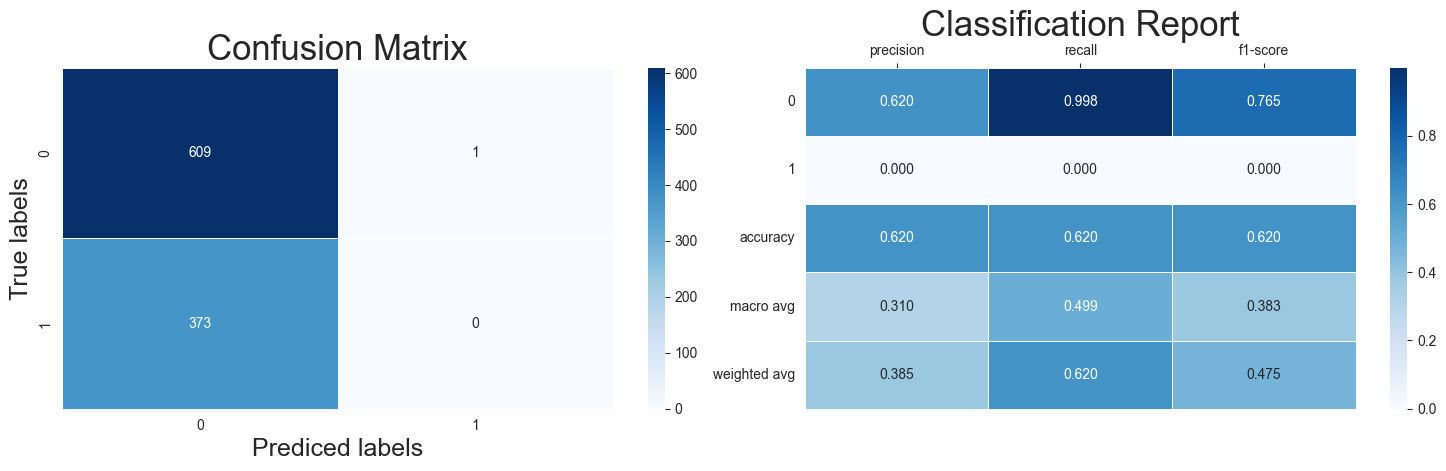

In [33]:
plot_result(y_pred_lr)